In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import *
from common.loss_functions import batch_cross_entropy_error
from two_layer_net import TwoLayerNet
import time

In [2]:
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, one_hot_label=True)

In [3]:
iters_num = 1000  # 실제 코드 : 10000
train_size = x_train.shape[0]
batch_size = 500  # 실제 코드 : 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = train_size // batch_size
print('iter_per_epoch =', iter_per_epoch)
print('epochs =', iters_num // iter_per_epoch 
      if iters_num % iter_per_epoch == 0 else iters_num // iter_per_epoch + 1)

iter_per_epoch = 120
epochs = 9


In [4]:
net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 50)
(50,)
(50, 10)
(10,)


In [5]:
# train
start_time = time.time()
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = net.numerical_gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b1'):
        net.params[key] -= learning_rate * grad[key]
    
    loss = net.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0 or i == iters_num-1:
        train_acc = net.accuracy(x_train, t_train)
        test_acc = net.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('%d iter train acc, test acc : %.4f, %.4f' 
              % (i, train_acc, test_acc))
        print('%d iteration time = %.2f sec' % (i, time.time() - start_time))

0 iter train acc, test acc : 0.0889, 0.0865
0 iteration time = 152.28 sec
120 iter train acc, test acc : 0.8062, 0.8123
120 iteration time = 18189.62 sec
240 iter train acc, test acc : 0.8670, 0.8725
240 iteration time = 36347.82 sec
360 iter train acc, test acc : 0.8840, 0.8906
360 iteration time = 55320.22 sec
480 iter train acc, test acc : 0.8932, 0.8988
480 iteration time = 73661.63 sec
600 iter train acc, test acc : 0.8956, 0.9025
600 iteration time = 92374.45 sec
720 iter train acc, test acc : 0.8979, 0.9042
720 iteration time = 110415.52 sec
840 iter train acc, test acc : 0.8992, 0.9053
840 iteration time = 128502.12 sec
960 iter train acc, test acc : 0.9015, 0.9072
960 iteration time = 146844.47 sec
999 iter train acc, test acc : 0.8979, 0.9044
999 iteration time = 152915.06 sec


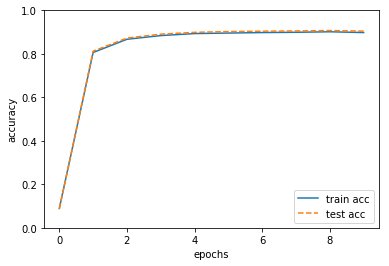

In [6]:
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()